# Covid 19 from John Hopkins Dataset

- 데이터 셋 : https://www.kaggle.com/antgoldbloom/covid19-data-from-john-hopkins-university
- 실시간으로 업데이트 되는 라이브 데이터
- 시계열 데이터가 있음. (시간별 변화 추이가 중요)

## 라이브러리 및 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df_case = pd.read_csv('RAW_global_confirmed_cases.csv')
df_death = pd.read_csv('RAW_global_deaths.csv')

pd.set_option('display.max_columns', None)

In [2]:
df_case.head()

,Country/Region,Province/State,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20,7/15/20,7/16/20,7/17/20,7/18/20,7/19/20,7/20/20,7/21/20,7/22/20,7/23/20,7/24/20,7/25/20,7/26/20,7/27/20,7/28/20,7/29/20,7/30/20,7/31/20,8/1/20,8/2/20,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20,9/22/20,9/23/20,9/24/20,9/25/20,9/26/20,9/27/20,9/28/20,9/29/20,9/30/20,10/1/20,10/2/20,10/3/20,10/4/20,10/5/20,10/6/20,10/7/20,10/8/20,10/9/20,10/10/20,10/11/20,10/12/20,10/13/20,10/14/20,10/15/20,10/16/20,10/17/20,10/18/20,10/19/20,10/20/20,10/21/20,10/22/20,10/23/20,10/24/20,10/25/20,10/26/20,10/27/20,10/28/20,10/29/20,10/30/20,10/31/20,11/1/20,11/2/20,11/3/20,11/4/20,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20,11/14/20,11/15/20,11/16/20,11/17/20,11/18/20,11/19/20,11/20/20,11/21/20,11/22/20,11/23/20,11/24/20,11/25/20,11/26/20,11/27/20,11/28/20,11/29/20,11/30/20,12/1/20,12/2/20,12/3/20,12/4/20,12/5/20,12/6/20,12/7/20,12/8/20,12/9/20,12/10/20,12/11/20,12/12/20,12/13/20,12/14/20,12/15/20,12/16/20,12/17/20,12/18/20,12/19/20,12/20/20,12/21/20,12/22/20,12/23/20,12/24/20,12/25/20,12/26/20,12/27/20,12/28/20,12/29/20,12/30/20,12/31/20,1/1/21,1/2/21,1/3/21,1/4/21,1/5/21,1/6/21,1/7/21,1/8/21,1/9/21,1/10/21,1/11/21,1/12/21,1/13/21,1/14/21,1/15/21,1/16/21,1/17/21,1/18/21,1/19/21,1/20/21,1/21/21,1/22/21,1/23/21,1/24/21,1/25/21,1/26/21,1/27/21,1/28/21,1/29/21,1/30/21,1/31/21,2/1/21,2/2/21,2/3/21,2/4/21,2/5/21,2/6/21,2/7/21,2/8/21,2/9/21,2/10/21,2/11/21,2/12/21,2/13/21,2/14/21,2/15/21,2/16/21,2/17/21,2/18/21,2/19/21,2/20/21,2/21/21,2/22/21,2/23/21,2/24/21,2/25/21,2/26/21,2/27/21,2/28/21,3/1/21,3/2/21,3/3/21,3/4/21,3/5/21,3/6/21,3/7/21,3/8/21,3/9/21,3/10/21,3/11/21,3/12/21,3/13/21,3/14/21,3/15/21,3/16/21,3/17/21,3/18/21,3/19/21,3/20/21,3/21/21,3/22/21,3/23/21,3/24/21
0,Afghanistan,NaN,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,2,4,4,4,4,5,7,8,11,12,13,15,16,18,20,24,25,29,30,34,41,43,76,80,91,107,118,146,175,197,240,275,300,338,368,424,445,485,532,556,608,666,715,785,841,907,934,997,1027,1093,1177,1236,1331,1464,1532,1704,1830,1940,2127,2291,2470,2705,2895,3225,3393,3564,3781,4042,4403,4687,4968,5227,5640,6054,6403,6665,7073,7654,8146,8677,9219,10001,10585,11176,11834,12459,13039,13662,14528,15208,15753,16512,17270,18057,18972,19554,20345,20920,21462,22146,22894,23550,2

## 데이터 구조 변경, 시각화

- 위-경도 사용하지 않고 큰 나라의 경우 지방이 많아 나뉘어져 있는데 묶어서 분석하는것이 용이할 듯.
- date columns이 단순 문자열로 입력되어 있는데 이를 datetime 객체로 변환하여 date가 index가 되도록 변경.

### 구조변경

In [3]:
df_case['Country/Region'].value_counts()

China             33
Canada            16
United Kingdom    12
France            12
Australia          8
                  ..
Ethiopia           1
Montenegro         1
Uzbekistan         1
Nicaragua          1
Chad               1
Name: Country/Region, Length: 192, dtype: int64

In [4]:
def fix_dataframe(df):
    df = df.drop(['Lat', 'Long'], axis=1).groupby('Country/Region').sum()
# 나라 기준으로 묶고 Province당 경우를 합하여 표현한다.

    df = df.transpose()
# 날짜가 인덱스가 되게끔 바꾸어준다.

    df.index.name = 'Date'
    df.reset_index(inplace=True)
    df['Date'] = df['Date'].apply(lambda s : pd.to_datetime(str(s)))

    df.set_index('Date', inplace=True)
    return df

- 데이터 프레임 구조를 바꾸고 date를 datetime 타입으로 바꾸어 인덱스로 만드는 함수를 만들어준다.

In [5]:
df_case = fix_dataframe(df_case)
df_death = fix_dataframe(df_death)

### 시각화

In [6]:
# 확진자 상위 10개국

ten_cases = df_case.loc[df_case.index[-1]].sort_values(ascending=False)[:10]
ten_cases

Country/Region
US                30011839
Brazil            12220011
India             11787534
Russia             4433364
France             4374774
United Kingdom     4326645
Italy              3440862
Spain              3234319
Turkey             3091282
Germany            2722988
Name: 2021-03-24 00:00:00, dtype: int64

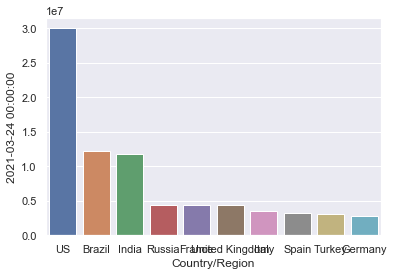

In [7]:
sns.barplot(x=ten_cases.index, y=ten_cases)

In [8]:
ten_death = df_death.loc[df_death.index[-1]][ten_cases.index] 
#sort_values 말고 확진자 10개국의 사망자를 확인해보자.
ten_death

Country/Region
US                545264
Brazil            300685
India             160692
Russia             94624
France             93083
United Kingdom    126621
Italy             106339
Spain              73744
Turkey             30462
Germany            75484
Name: 2021-03-24 00:00:00, dtype: int64

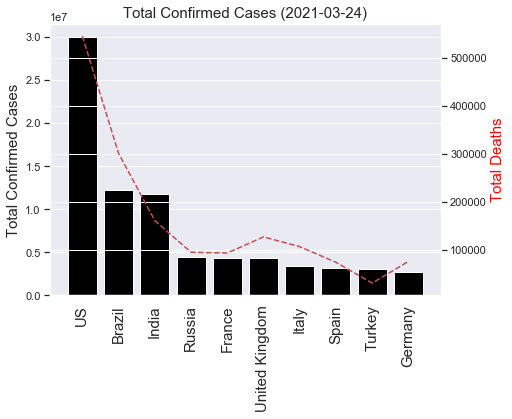

In [9]:
# 확진자와 사망자를 동시에 보여주기.
plt.figure(figsize=(7,5))

sns.barplot(x=ten_cases.index, y=ten_cases, color='black')
plt.xticks(rotation=90, size=15)
plt.ylabel('Total Confirmed Cases', size=15)
plt.xlabel('')
plt.title('Total Confirmed Cases (%s)' %ten_cases.name.strftime('%Y-%m-%d'), size=15)

ax = plt.gca()
ax2 = ax.twinx()
ax2.plot(ten_death.index, ten_death, 'r--')
ax2.set_ylabel('Total Deaths', color='red', size=15)
plt.show()

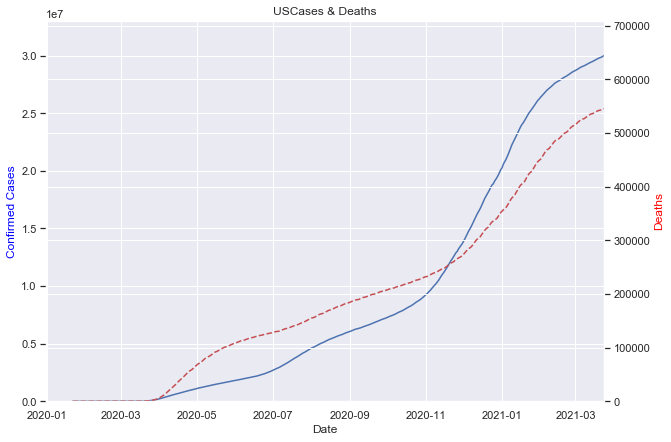

In [10]:
# 미국만 알아보자.
plt.figure(figsize=(10,7))

plt.plot(df_case.index, df_case['US'], 'b-')
plt.ylabel('Confirmed Cases', color='blue')
plt.xlabel('Date')
plt.xlim(right=df_case.index[-1])
plt.ylim(0, df_case['US'].max()*1.1)
plt.title('US' + 'Cases & Deaths')

ax = plt.gca()
ax2 = ax.twinx()
ax2.plot(df_death.index, df_death['US'], 'r--')
ax2.set_ylabel('Deaths', color='red')
ax2.set_ylim(0, df_death['US'].max()*1.3)

plt.show()

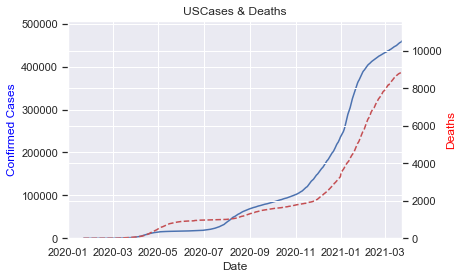

In [11]:
# 재미로 일본도

plt.figure(figsize=(6,4))

plt.plot(df_case.index, df_case['Japan'], 'b-')
plt.ylabel('Confirmed Cases', color='blue')
plt.xlabel('Date')
plt.xlim(right=df_case.index[-1])
plt.ylim(0, df_case['Japan'].max()*1.1)
plt.title('US' + 'Cases & Deaths')

ax = plt.gca()
ax2 = ax.twinx()
ax2.plot(df_death.index, df_death['Japan'], 'r--')
ax2.set_ylabel('Deaths', color='red')
ax2.set_ylim(0, df_death['Japan'].max()*1.3)

plt.show()

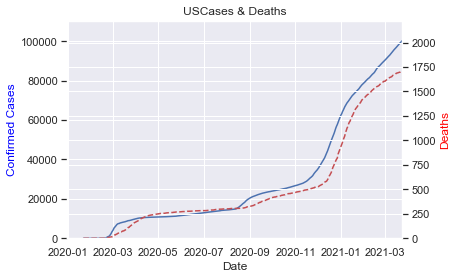

In [12]:
# 한국
plt.figure(figsize=(6,4))

plt.plot(df_case.index, df_case['Korea, South'], 'b-')
plt.ylabel('Confirmed Cases', color='blue')
plt.xlabel('Date')
plt.xlim(right=df_case.index[-1])
plt.ylim(0, df_case['Korea, South'].max()*1.1)
plt.title('US' + 'Cases & Deaths')

ax = plt.gca()
ax2 = ax.twinx()
ax2.plot(df_death.index, df_death['Korea, South'], 'r--')
ax2.set_ylabel('Deaths', color='red')
ax2.set_ylim(0, df_death['Korea, South'].max()*1.3)

plt.show()

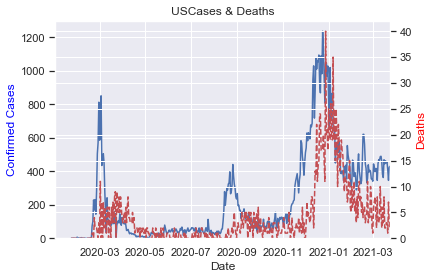

In [13]:
# 누적 말고 일일데이터는?
plt.plot(df_case.index, df_case['Korea, South'].diff(), 'b-')
plt.ylabel('Confirmed Cases', color='blue')
plt.xlabel('Date')
plt.xlim(right=df_case.index[-1])
plt.ylim(bottom = 0)
plt.title('US' + 'Cases & Deaths')

ax = plt.gca()
ax2 = ax.twinx()
ax2.plot(df_death.index, df_death['Korea, South'].diff(), 'r--')
ax2.set_ylabel('Deaths', color='red')
ax2.set_ylim(bottom=0)

plt.show()

- diff()만 붙히면 해결되는데, diff는 기준과 그 전의 차이를 나타내고, df_case[나라]가 누적확진자이므로 일일확진자로 표현할 수 있다.
- 작년 3월 대구 사건이 2번째로 영향이 크다. 사망자는 당연하게도 확진자가 급증한 이후에 간격을두고 역시 늘어났다.

## 전처리

- FBProhphet 사용하기 위해 전처리
- FBProhphet 사용은 공식 레퍼런스를 참조 함 : https://facebook.github.io/prophet/docs/quick_start.html#python-api

In [14]:
df_case.reset_index()[['Date', 'Korea, South']]

Country/Region,Date,"Korea, South"
0,2020-01-22,1
1,2020-01-23,1
2,2020-01-24,2
3,2020-01-25,2
4,2020-01-26,3
...,...,...
423,2021-03-20,98665
424,2021-03-21,99075
425,2021-03-22,99421
426,2021-03-23,99846


In [15]:
df = pd.DataFrame(df_case.reset_index()[['Date', 'Korea, South']].to_numpy(), columns=['ds', 'y'])
df

,ds,y
0,2020-01-22,1
1,2020-01-23,1
2,2020-01-24,2
3,2020-01-25,2
4,2020-01-26,3
...,...,...
423,2021-03-20,98665
424,2021-03-21,99075
425,2021-03-22,99421
426,2021-03-23,99846


In [16]:
from math import floor

def train_test_split_df(df, test_size):
    div = floor(df.shape[0] * (1 - test_size))
    return df.loc[:div], df.loc[div + 1:]

train_df, test_df = train_test_split_df(df, 0.1)

In [17]:
train_df.shape

(386, 2)

In [18]:
train_df.tail()

,ds,y
381,2021-02-06,80896
382,2021-02-07,81185
383,2021-02-08,81487
384,2021-02-09,81930
385,2021-02-10,82434


In [19]:
test_df.head()

,ds,y
386,2021-02-11,82837
387,2021-02-12,83199
388,2021-02-13,83525
389,2021-02-14,83869
390,2021-02-15,84325


## 모델 학습(Prophet)

In [24]:
from fbprophet import Prophet

model = Prophet(changepoint_range = 1.0)
model.fit(train_df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\dissi\anaconda31\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [22]:
from fbprophet.plot import add_changepoints_to_plot

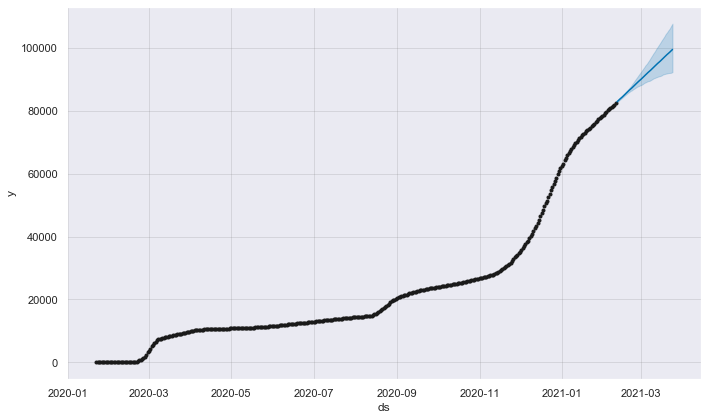

In [25]:
pred = model.predict(test_df)
model.plot(pred);

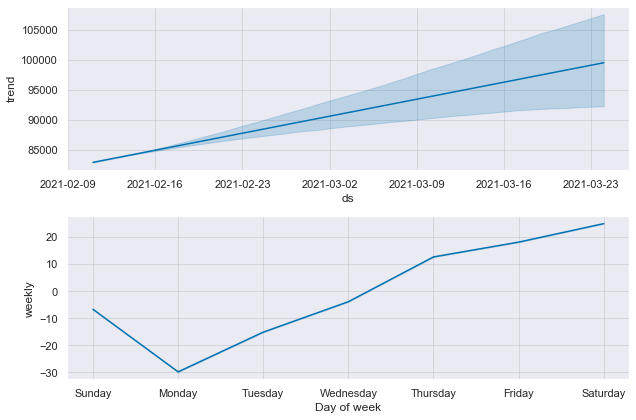

In [26]:
model.plot_components(pred);
# 주마다 경향

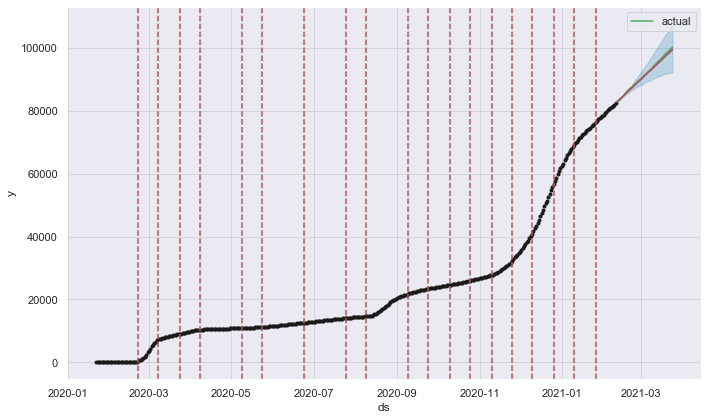

In [27]:
fig = model.plot(pred)
plt.plot(test_df['ds'], test_df['y'], 'g-', label='actual')
add_changepoints_to_plot(fig.gca(), model, pred)
plt.legend()

- 실제랑 거의 동일
- 실제 양상이 변칙적인 상황없이 예상대로 흘러감을 뜻함.

## 모델평가

In [28]:
from sklearn.metrics import r2_score
print('R2 Score : ', r2_score(test_df['y'], pred['yhat']))

R2 Score :  0.9928405923770204


## 앞으로 30일 예측

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\dissi\anaconda31\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


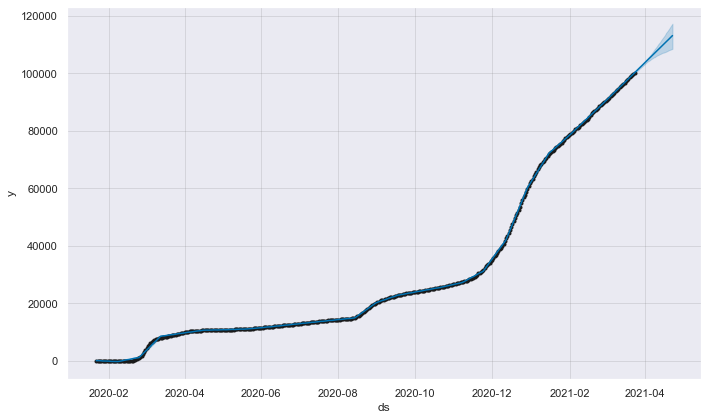

In [29]:
model = Prophet(changepoint_range=1.0)
model.fit(df)
future = model.make_future_dataframe(30)
pred = model.predict(future)
model.plot(pred);

### 과거 데이터

- 몇 가지 특수한 사건을 통해 코로나가 급증하게 되었는데 만약 이 사건이 벌어지지 않았다면 지금쯤 어떤 양상을 보일지 분석해보고자 한다.

In [33]:
df.loc[26:32]

# 2월 20일 기준으로 급격히 늘어남.

,ds,y
26,2020-02-17,30
27,2020-02-18,31
28,2020-02-19,31
29,2020-02-20,104
30,2020-02-21,204
31,2020-02-22,433
32,2020-02-23,602


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\dissi\anaconda31\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


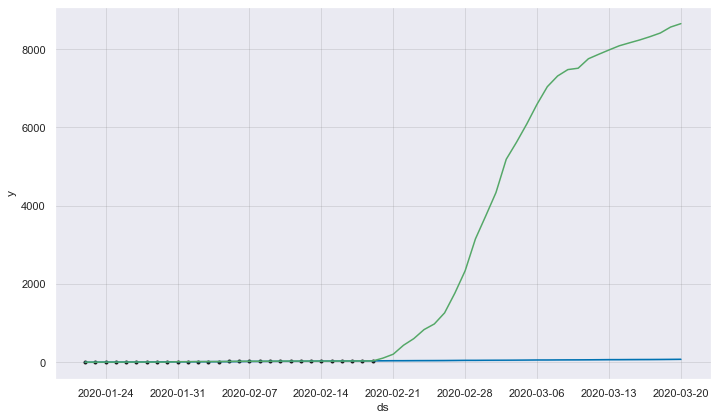

In [35]:
model = Prophet(changepoint_range=1.0)
model.fit(df.loc[:28])
future2 = model.make_future_dataframe(30)
pred = model.predict(future2)
model.plot(pred);

plt.plot(df.loc[:58]['ds'], df.loc[:58]['y'], 'g-')
plt.show()

- 극단적인 차이가 남.
- 작은사건 하나가 미치는 큰 영향을 확인할 수 있으며, 모든걸 통제하고 예측해야하는 방역 체계가 얼마나 힘든지 알 수 있다.
- 모두 조심한다고 해도 조그만 사건을 통해 이런 무서운 결과가 발생할 수 있음은 방역에 대한 매너리즘에서 빠져나올 수 있게 해준다.